In [109]:
import pandas as pd

In [110]:
data = pd.read_csv("Carseats.csv")

In [111]:
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [112]:
data.shape

(400, 11)

In [113]:
data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


In [114]:
import seaborn as sns

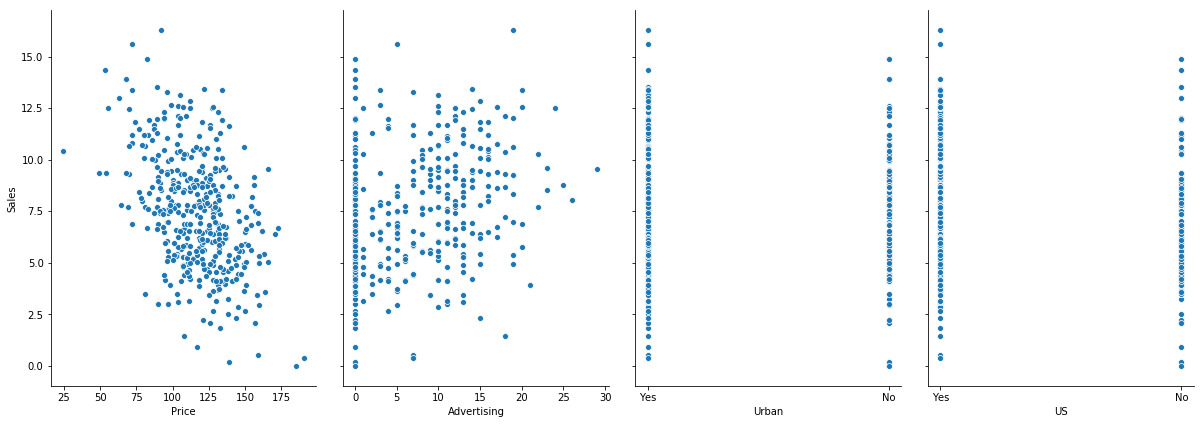

In [115]:
sns.pairplot(data,x_vars=['Price','Advertising', 'Urban', 'US'],y_vars='Sales',height=6,aspect=0.7)

In [116]:
X=data[['Price','Advertising','Urban','US']]
y=data['Sales']

In [117]:
X.head()

,Price,Advertising,Urban,US
0,120,11,Yes,Yes
1,83,16,Yes,Yes
2,80,10,Yes,Yes
3,97,4,Yes,Yes
4,128,3,Yes,No


In [118]:
y.head()

0     9.50
1    11.22
2    10.06
3     7.40
4     4.15
Name: Sales, dtype: float64

In [119]:
X_NUMERIC = pd.get_dummies(X, columns=['Urban', 'US'],drop_first=True)

In [120]:
X_NUMERIC.head()

,Price,Advertising,Urban_Yes,US_Yes
0,120,11,1,1
1,83,16,1,1
2,80,10,1,1
3,97,4,1,1
4,128,3,1,0




Splitting X and y into training and testing sets

In [101]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test=train_test_split(X_NUMERIC,y,test_size=0.2,random_state=1)
X_train.head()

,Price,Advertising,Urban_Yes,US_Yes
93,104,0,1,0
23,109,0,1,0
299,96,17,0,1
13,86,11,1,1
90,103,0,0,0


In [121]:
from sklearn.linear_model import LinearRegression

In [122]:
linreg= LinearRegression()

In [123]:
linreg.fit(X,y)

ValueError: could not convert string to float: 'Yes'

In [105]:
print(linreg.intercept_)
print(linreg.coef_)

12.829845425880336
[-0.05197482  0.13114564 -0.08957959 -0.10384575]


In [106]:
import statsmodels.api as sm
from scipy import stats

In [107]:

X2= sm.add_constant(X_train)
est=sm.OLS(y_train,X2)
est2= est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.261
Model:                            OLS   Adj. R-squared:                  0.252
Method:                 Least Squares   F-statistic:                     27.83
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           8.42e-20
Time:                        16:14:54   Log-Likelihood:                -735.22
No. Observations:                 320   AIC:                             1480.
Df Residuals:                     315   BIC:                             1499.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.8298      0.750     17.112      

C:\Users\17pri\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
